In [1]:
print('Hello Python')

Hello Python


In [2]:
# Introduction of timeseries.

# Data that is collected over time and is dependent on it.

# stock prices, number of visitors in a museum, fuel prices, Autombiles sales data.

In [3]:
# Importance of timeseries analysis , timeseries forecasting.

# problem statement? ---> Investment to be made in a organisation EV's.


# sales, previous organisation-----> consumption or requirement of Ev's in the next 5 years, 10 years.

# analyzing the past 5 years of product sold---------> forecast ----> 10 years.

In [4]:
# pandemic covid 19.


# timeseries forecasting ---> casuality---> Active caseses---> recovered.



In [5]:
# industry application:

# Business, finance , supply chain management, production , inventory planning .

In [6]:
import pandas as pd

In [7]:
data=pd.read_csv("AirPassengers.csv")

In [8]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [10]:
# date time format.
data['Month']=pd.to_datetime(data['Month'])

In [11]:
data.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [12]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [13]:
# setting the index as month.
# 
data=data.set_index(data['Month'])

In [14]:
# alternative way
data.index=data['Month']

In [15]:
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [16]:
del data['Month']

In [17]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [18]:
data.shape

(144, 1)

In [19]:
data.isna().sum()

#Passengers    0
dtype: int64

In [20]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [21]:
# general Process for ARIMA(Auto regressive Intergrated Moving Average)/ SeasonalARIMA.

# 1. visualize time series data.

# 2. Identify whether the time series is stationary or non stationary.
#  Make it stationary ---> differencing , rolling mean.
# Minimizing the trends, sesonality 
#Plot of correlation ,PACF.
# Auto Arima ----> Best model ---> P,D,Q

# Construct ARIMA and Seasonal ARIMA.

#Make the forecast for next 5 years.



In [22]:
import matplotlib.pyplot as plt

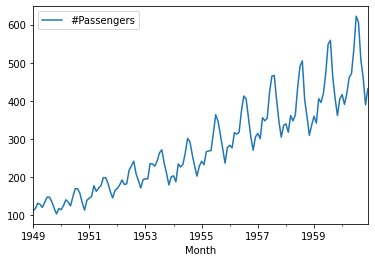

In [23]:
data.plot()

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

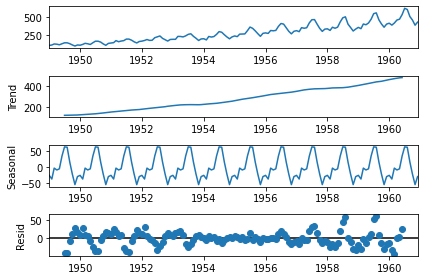

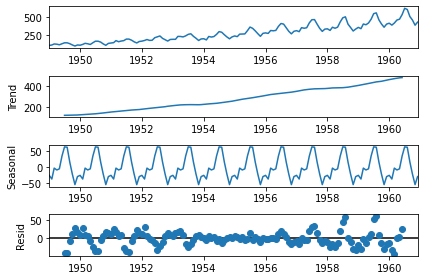

In [25]:
dec_r=seasonal_decompose(data)

dec_r.plot()

In [26]:
# sesonality:  Look sales data for icecream---> Summer 

# Trend---> upward trend.

In [27]:
# check the staionarity of the data.

# statistical properties(mean, variance) ----> changing with time--> non stationary time series
#                                       ----> not changing with respect to time.--> stationary timeseries.

# ADF---> Augmented dickyfuller test.

# p values  ---> greater than 0.05---> non stationary timeseries.

# p values----> smaller than 0.05--> stationary timeseries.

In [28]:
# h0--->it is non stationary--> null hypothesis
# h1---> it is stationary--> alternative hypothesis

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
result=adfuller(data['#Passengers'])

In [31]:
result

(0.8153688792060472,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [32]:
print('ADF statistics:',result[0])
print('P value',result[1])

ADF statistics: 0.8153688792060472
P value 0.991880243437641


In [33]:
# for now my timeseries is non stationary , hvaing probability value more than 0.05.

In [34]:
# Trend is a pattern in data that shows the movemenet of series in higher or lower valuesd with respect to time.
# rolling mean differencing to remove the trends 

In [35]:
rolling_mean=data.rolling(window=12).mean()

In [36]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [37]:
rolling_mean

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


In [38]:
rolling_mean_detrended=data-rolling_mean   # detrending the timseries.

In [39]:
rolling_mean_detrended

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,142.666667
1960-09-01,40.916667
1960-10-01,-10.583333


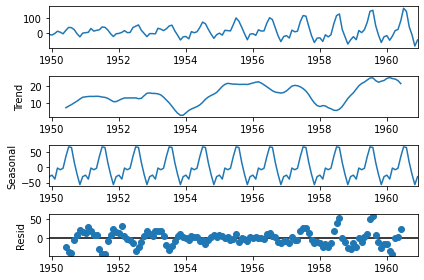

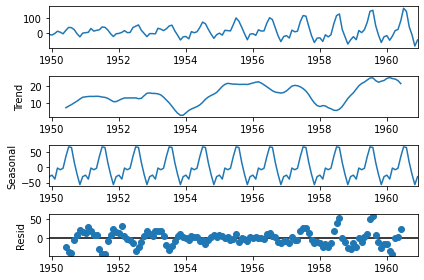

In [40]:
# analysing the rolling mean differencing.
dec_r_dt=seasonal_decompose(rolling_mean_detrended.dropna())

dec_r_dt.plot()

In [41]:
# reduce the sesonality from timeseries.

rolling_mean_detrended

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,142.666667
1960-09-01,40.916667
1960-10-01,-10.583333


In [42]:
rolling_mean_detrended.shift()  # shifted the observation  by 1 month.

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,162.583333
1960-09-01,142.666667
1960-10-01,40.916667


In [43]:
rolling_mean_detrended_diff=rolling_mean_detrended-rolling_mean_detrended.shift()

In [44]:
rolling_mean_detrended_diff

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,-19.916667
1960-09-01,-101.750000
1960-10-01,-51.500000


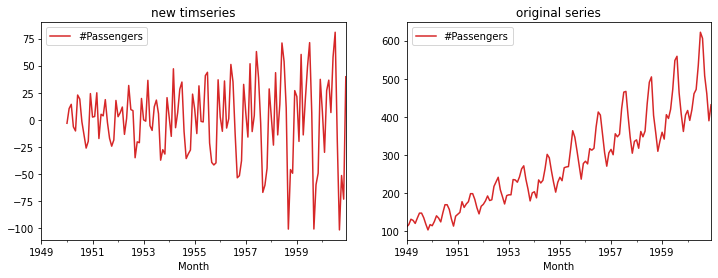

In [45]:
# visulaizing the timeseries.
ax1=plt.subplot(121)
rolling_mean_detrended_diff.plot(figsize=(12,4),color="tab:red",title="new timseries",ax=ax1)


ax2=plt.subplot(122)
data.plot(figsize=(12,4),color="tab:red",title="original series",ax=ax2)

In [46]:
result1=adfuller(rolling_mean_detrended_diff['#Passengers'].dropna())

In [47]:
result1

(-3.1544826348635744,
 0.022775264967859313,
 12,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 908.7516655845259)

In [48]:
print('ADF statistics:',result1[0])
print('P value',result1[1])

ADF statistics: -3.1544826348635744
P value 0.022775264967859313


In [49]:
rolling_mean_detrended_diff=rolling_mean_detrended_diff.dropna()

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

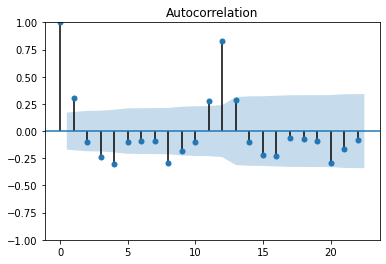

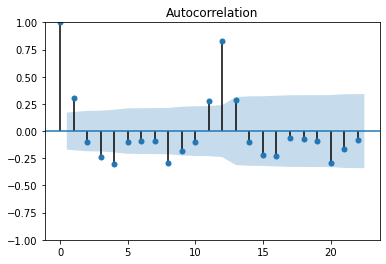

In [51]:
plot_acf(rolling_mean_detrended_diff['#Passengers'])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


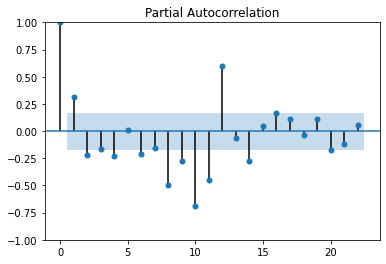

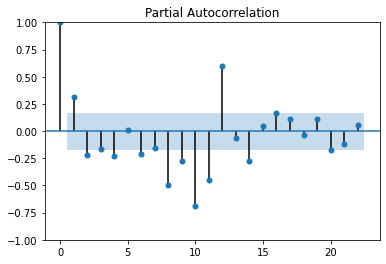

In [52]:
plot_pacf(rolling_mean_detrended_diff['#Passengers'])

In [53]:
# pmdarima after installation.


from pmdarima import auto_arima

In [54]:
order=auto_arima(rolling_mean_detrended_diff['#Passengers'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1314.475, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1303.387, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1298.888, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1312.483, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1295.760, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1297.960, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1298.290, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1293.760, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1296.888, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1301.389, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0

In [56]:
rolling_mean_detrended_diff.shape

(132, 1)

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX , SARIMAXResults

In [58]:
train=rolling_mean_detrended_diff.iloc[:120]['#Passengers']
test=rolling_mean_detrended_diff.iloc[121:]['#Passengers']

In [59]:
# building up my model and training.

sky=SARIMAX(train,order=(3,0,3),seasonal_order=(3,0,3,12)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting 

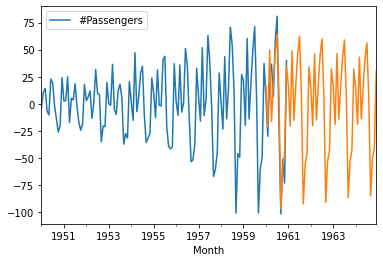

In [62]:
# predicting the projections for the next 5 years.
# 12*5=60
p_5=sky.forecast(steps=60)
rolling_mean_detrended_diff.plot()
p_5.plot()

In [61]:
# 2 things home take away task.

# transform.

# Accuracy of the prediction.

1960-01-01    16.776676
1960-02-01   -21.516335
1960-03-01    49.557198
1960-04-01   -16.473849
1960-05-01    19.941700
1960-06-01    46.846268
1960-07-01    64.491575
1960-08-01     6.904598
1960-09-01   -97.109144
1960-10-01   -57.313797
1960-11-01   -46.325753
1960-12-01    34.646249
1961-01-01    17.019076
1961-02-01   -20.446362
1961-03-01    48.910996
1961-04-01   -15.079506
1961-05-01    17.782639
1961-06-01    45.851440
1961-07-01    62.485730
1961-08-01     6.000465
1961-09-01   -92.520083
1961-10-01   -56.336037
1961-11-01   -45.613001
1961-12-01    34.033781
1962-01-01    14.692250
1962-02-01   -20.269027
1962-03-01    46.006692
1962-04-01   -15.027839
1962-05-01    17.877588
1962-06-01    44.854263
1962-07-01    59.975196
1962-08-01     6.670570
1962-09-01   -91.117782
1962-10-01   -52.729276
1962-11-01   -43.789455
1962-12-01    32.056154
1963-01-01    16.147214
1963-02-01   -19.066897
1963-03-01    46.533084
1963-04-01   -14.204733
1963-05-01    17.077792
1963-06-01    42